# Câu hỏi: Dựa vào cột mô tả về mức độ đọc, thì có thể phân loại các mức độ như thế nào cho từng nhóm điểm?

In [5]:
import pyarrow.parquet as pa
table = pa.read_table('metadata_en.parquet')

In [6]:
import pandas as pd
df = table.to_pandas()
df.head()

,title,creator,birthdate,deathdate,publisher,issued,rights,language,subjects,description,Index
1,The Master Spirit,"Magnay, William, Sir",1855,1917,Project Gutenberg,2022-03-25,Public domain in the USA.,en,"[London (England) -- Fiction, Love stories, Ad...",[Reading ease score: 71.3 (7th grade). Fairly ...,67703
2,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,Project Gutenberg,2017-11-05,Public domain in the USA.,en,"[Orphans -- Juvenile fiction, Siblings -- Juve...",[Reading ease score: 77.9 (7th grade). Fairly ...,55891
3,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,Project Gutenberg,2019-04-09,Public domain in the USA.,en,"[Fantasy fiction, Conduct of life -- Juvenile ...",[Reading ease score: 76.2 (7th grade). Fairly ...,59235
4,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",None,None,Project Gutenberg,2013-07-31,Public domain in the USA.,en,[Grand Junction Railway Company (Great Britain...,[Reading ease score: 65.5 (8th & 9th grade). N...,43367
5,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,Project Gutenberg,2014-05-04,Public domain in the USA.,en,"[Playing cards -- History, GV]",[Reading ease score: 62.7 (8th & 9th grade). N...,45584


In [7]:
import re

# Regular expression to extract the score and bracket content
pattern = r'Reading ease score:\s([\d.]+)\s\((.*?)\)\.\s(.*)'

score_list = []
grade_list = []
level_list = []
temp = df.copy()
for i in range(len(temp)):
  list_texts = temp.iloc[i]['description']
  if list_texts is not None:
    for text in list_texts:
      match = re.search(pattern, text)
      if match:
        score = match.group(1)  # Extract the reading ease score
        bracket_content = match.group(2)
        level = match.group(3)  # Extract text after the bracket
        score_list.append(score)
        grade_list.append(bracket_content)
        level_list.append(level)

In [8]:
description = pd.DataFrame({
    'score': score_list,
    'grade': grade_list,
    'level': level_list
})

In [9]:
description.head(20)

,score,grade,level
0,71.3,7th grade,Fairly easy to read.
1,77.9,7th grade,Fairly easy to read.
2,76.2,7th grade,Fairly easy to read.
3,65.5,8th & 9th grade,Neither easy nor difficult to read.
4,62.7,8th & 9th grade,Neither easy nor difficult to read.
5,72.8,7th grade,Fairly easy to read.
6,84.1,6th grade,Easy to read.
7,80.3,6th grade,Easy to read.
8,63.7,8th & 9th grade,Neither easy nor difficult to read.
9,68.7,8th & 9th grade,Neither easy nor difficult to read.


In [10]:
description['grade'].unique()

array(['7th grade', '8th & 9th grade', '6th grade', 'College-level',
       '10th to 12th grade', '5th grade', 'College graduate level',
       'Professional level'], dtype=object)

In [11]:
description['level'].unique()

array(['Fairly easy to read.', 'Neither easy nor difficult to read.',
       'Easy to read.', 'Difficult to read.',
       'Somewhat difficult to read.', 'Very easy to read.',
       'Very difficult to read.', 'Extremely difficult to read.'],
      dtype=object)

In [12]:
description['score'] = description['score'].astype(float)

In [13]:
for i in range(len(description)): #chỉnh format .0 với .5
  description.loc[i, "score"] = round(description.loc[i, "score"] * 2) / 2

In [14]:
description['level'] = description['level'].map({
    'Fairly easy to read.': 'Easy',
    'Easy to read.': 'Easy',
    'Very easy to read': 'Easy',
    'Fairly difficult to read.': 'Difficult',
    'Difficult to read.': 'Difficult',
    'Somewhat difficult to read.': 'Difficult',
    'Very difficult to read.': 'Difficult',
    'Extremely difficult to read.': 'Difficult',
    'Neither easy nor difficult to read.': 'Moderate'

})

In [15]:
description

,score,grade,level
0,71.5,7th grade,Easy
1,78.0,7th grade,Easy
2,76.0,7th grade,Easy
3,65.5,8th & 9th grade,Moderate
4,62.5,8th & 9th grade,Moderate
...,...,...,...
58152,49.5,College-level,Difficult
58153,83.5,6th grade,Easy
58154,78.5,7th grade,Easy
58155,58.5,10th to 12th grade,Difficult


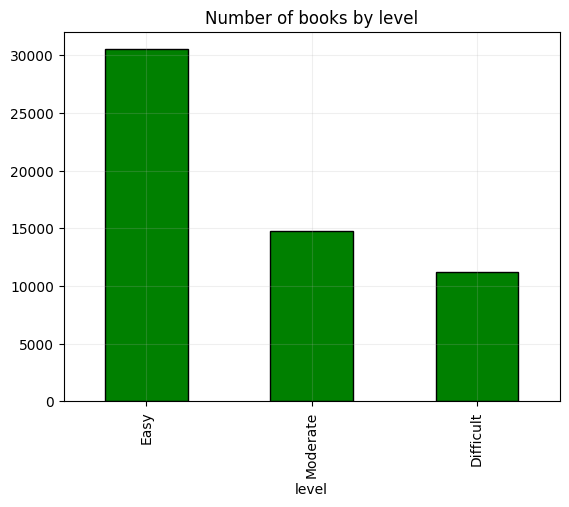

In [16]:
import matplotlib.pyplot as plt

description['level'].value_counts().plot(kind='bar', color='green', edgecolor='black', title="Number of books by level")
plt.grid(alpha=0.2)

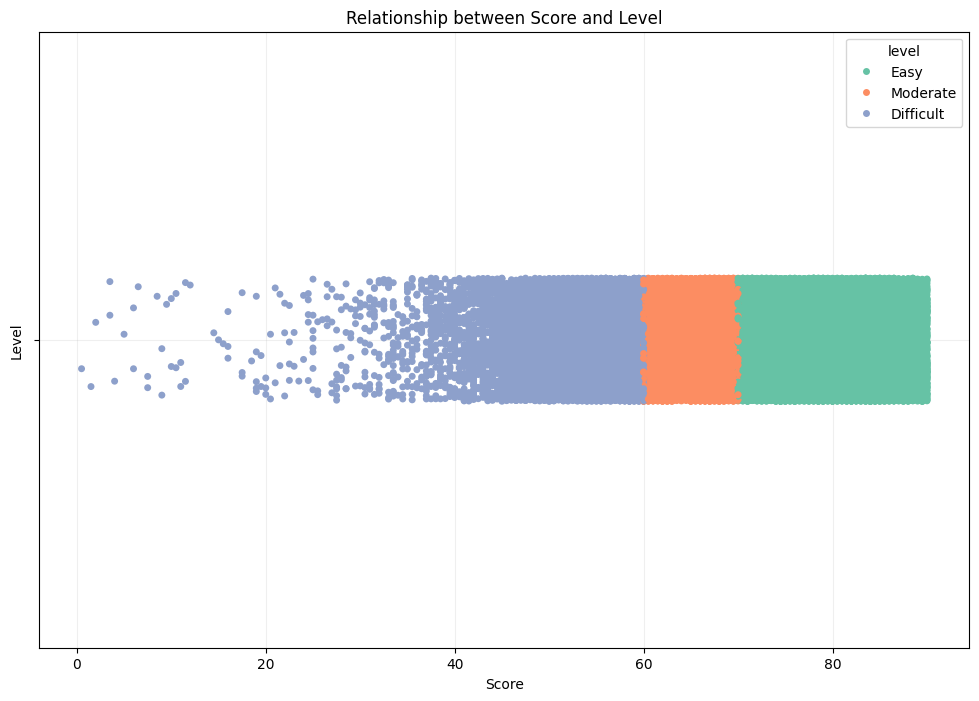

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 8))
temp = description.dropna().copy()
sns.stripplot(data=temp, x=temp['score'], hue=temp['level'], palette='Set2')
plt.xlabel('Score')
plt.ylabel('Level')
plt.title('Relationship between Score and Level')
plt.grid(alpha=0.2)
plt.show()

Ranh giới khá rõ ràng, có thể thấy biên giữa `Easy` và `Moderate` là ~60 điểm, còn biên giữa `Moderate` và `Difficult` là ~70 điểm.